In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

## adding a column with the sum of Na2O and K2O

In [4]:
cols_of_interest = [0, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

In [86]:
petro_df = pd.read_excel("../_INTERPOLATION/coordinates_full_data.xlsx", index_col=0, usecols=cols_of_interest)

In [87]:
petro_df["Na2O+K2O"] = petro_df["Na2O"] + petro_df["K2O"]

In [88]:
petro_df

,Latitude,Longitude,past_mer,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,...,Na2O,K2O,P2O5,l.i.,oth,sum,hs,type_granite,time,Na2O+K2O
1,"44°31'30.0""","138°37'30.0""",NaN,80.598504,0.039900,10.134663,0.608479,1.715711,0.009975,0.399002,...,1.995012,3.581047,0.009975,0.349127,0.009975,100.0,0.01,Granite leucogranitic,K2,5.576060
2,"54°12'10.0""","119°24'0.0""",NaN,80.272928,0.100341,10.134457,0.170580,0.561910,0.020068,0.401365,...,2.307847,5.117399,0.050171,0.501706,0.010034,100.0,0.01,Granite leucocratic,Tr,7.425246
3,"62°36'0.0""","155°36'0.0""",NaN,79.888045,0.049980,9.886046,0.159936,1.729308,0.019992,0.119952,...,0.749700,6.147541,0.009996,1.019592,0.079968,100.0,0.30,Granite leucocratic coarse-grained,K2,6.897241
4,"61°35'0.0""","146°2'0.0""",NaN,79.104181,0.039726,9.573940,1.142119,0.744860,0.099315,0.446916,...,3.684576,4.220876,0.009931,0.258218,0.009931,100.0,0.01,Granite leucocratic,K1,7.905452
5,"68°55'0.0""","164°24'0.0""",NaN,78.707753,0.079523,10.178926,0.636183,2.584493,0.039761,0.049702,...,1.510934,3.061630,0.009940,1.739563,0.159046,100.0,0.28,Granite-porphyry micropegmatitic,K1,4.572565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,"66°42'0.0""","164°23'0.0""",NaN,50.977849,0.389144,19.397326,4.081022,4.959090,0.219517,3.781680,...,4.110956,2.005588,0.588705,1.476751,0.009978,100.0,0.30,Diorite,K1,6.116544
4656,"46°56'30.0""","137°5'3.0""",NaN,50.768003,0.997407,17.713944,2.603232,8.966687,0.099741,5.056852,...,2.653102,1.635747,0.259326,0.797925,0.009974,100.0,0.01,Quartz diorite,K2,4.288849
4657,"58°12'0.0""","138°12'0.0""",NaN,50.214207,1.145761,17.963535,4.194480,5.200757,0.159410,5.818472,...,2.670121,2.231743,0.468267,1.484507,0.029889,100.0,0.47,Diorite,J3,4.901863
4658,"60°51'0.0""","147°31'0.0""",NaN,50.139442,1.125498,21.922311,2.270916,4.163347,0.099602,2.719124,...,4.043825,1.085657,0.458167,2.589641,0.009960,100.0,0.47,Diorite,K2,5.129482


In [43]:
# Read in petro data of different areas
petro_areas = {}

for i in range(1, 6):
    temp = pd.read_excel(f"../_INTERPOLATION/area{i}.xlsx", index_col=0, usecols=cols_of_interest)
    temp["Na2O+K2O"] = temp["Na2O"] + temp["K2O"]
    temp.name = f"petro{i}"
    petro_areas[f"area{i}"] = temp

## ternary plot Na2O+K2O, Fe, Mg

In [101]:
Irvine_Barangar_boundary = np.array([[70.0, 30.0,  0], 
                                   [62.1, 32.9,  5], 
                                   [47.4, 42.6, 10], 
                                   [34.3, 50.7, 15], 
                                   [25.7, 54.3, 20], 
                                   [21.1, 53.9, 25], 
                                   [19.2, 50.8, 30], 
                                   [18.3, 46.7, 35], 
                                   [17.5, 42.5, 40], 
                                   [16.1, 38.9, 45], 
                                   [14.4, 35.6, 50], 
                                   [12.6, 32.4, 55], 
                                   [11.2, 28.8, 60], 
                                   [10.4, 24.6, 65], 
                                   [10.1, 19.9, 70], 
                                   [10.3, 14.7, 75], 
                                   [10.3,  9.7, 80], 
                                   [10.0,  5.0, 85], 
                                   [ 9.2,  0.8, 90]]) 

##### boundary = (70, 30, 0), (62.1, 32.9, 5), (47.4, 42.6, 10), (34.3, 50.7, 15), (25.7, 54.3, 20), (21.1, 53.9, 25), (19.2,50.8, 30), (18.3,46.7, 35), (17.5, 42.5, 40), (16.1, 38.9, 45), (14.4,35.6, 50), (12.6, 32.4, 55), (11.2, 28.8, 60), (10.4,24.6, 65), (10.1, 19.9, 70), ( 10.3, 14.7, 75), ( 10.3, 9.7, 80), ( 10.0, 5.0, 85), (9.2, 0.8, 90) 

#### --> according to Irvine and Baragar ( 1971)

In [91]:
petro_df = petro_df[~petro_df["time"].isnull()]

___

**Things to check**
- There are still some nan values in the time column
- There are nan values for some of the Na2O+K2O, FeO or MgO values in areas 1-3 which result in errors when trying to plot them with the new ternary plotting function
- Find out if the way forward is with plotly express which makes it easy to color data point by a specified category, or use standard plotly because it gives more control over the figure (a combination of both might also be possible of course)

____

In [124]:
def plot_ternary_diagram(petro=None, A="FeO", B="Na2O+K2O", C="MgO", 
                         save_name=None, Irvine_Barangar=True):
    """Plots ternary diagram with NaO+K2O (b), FeO (a) and MgO (c) as defaults
    """
    

    if petro is not None:
        fig = px.scatter_ternary(petro, a=A, b=B, c=C, color="time", title=save_name)
#         fig.add_trace(
#         go.Scatterternary(
#            a = petro[A],
#            b = petro[B],
#            c = petro[C], 
#             mode='markers',
#             marker={'symbol': 100,
#                     'color': 'green',
#                     'size': 5},
#         ))

    if Irvine_Barangar:
        # Since we don't need the entire new figure we select 
        # the data[0] part of it to add to the existing figure
        # ref: https://community.plot.ly/t/many-traces-on-same-plot-in-plotly-express/27694/2
        fig.add_trace(
            px.line_ternary(
              a = Irvine_Barangar_boundary[:, 1],
              b = Irvine_Barangar_boundary[:, 0],
              c = Irvine_Barangar_boundary[:, 2],
            ).data[0]
        )
        
#     else:
#         fig = px.line_ternary()
    
#     fig.update_layout({
#     'title': save_name,
#     'ternary':{
#         'sum':1,
#         'aaxis':{'title': 'FeO', 
#                  'min': 0.01, 'linewidth':2, 'ticks':'outside' },
#         'baxis':{'title': 'Na2O+K2O', 
#                  'min': 0.01, 'linewidth':2, 'ticks':'outside' },
#         'caxis':{'title': 'MgO', 
#                  'min': 0.01, 'linewidth':2, 'ticks':'outside' }
#         },
#     'showlegend': True
#     })
    
    fig.show()
    
    if save_name is not None:
        fig.write_image(f"../_FIGURES/ternary_diagrams/ternary_diagram_{A}-{B}-{C}_{save_name}.pdf")
        fig.write_html(f"../_FIGURES/ternary_diagrams/ternary_diagram_{A}-{B}-{C}_{save_name}.html", auto_open=False)

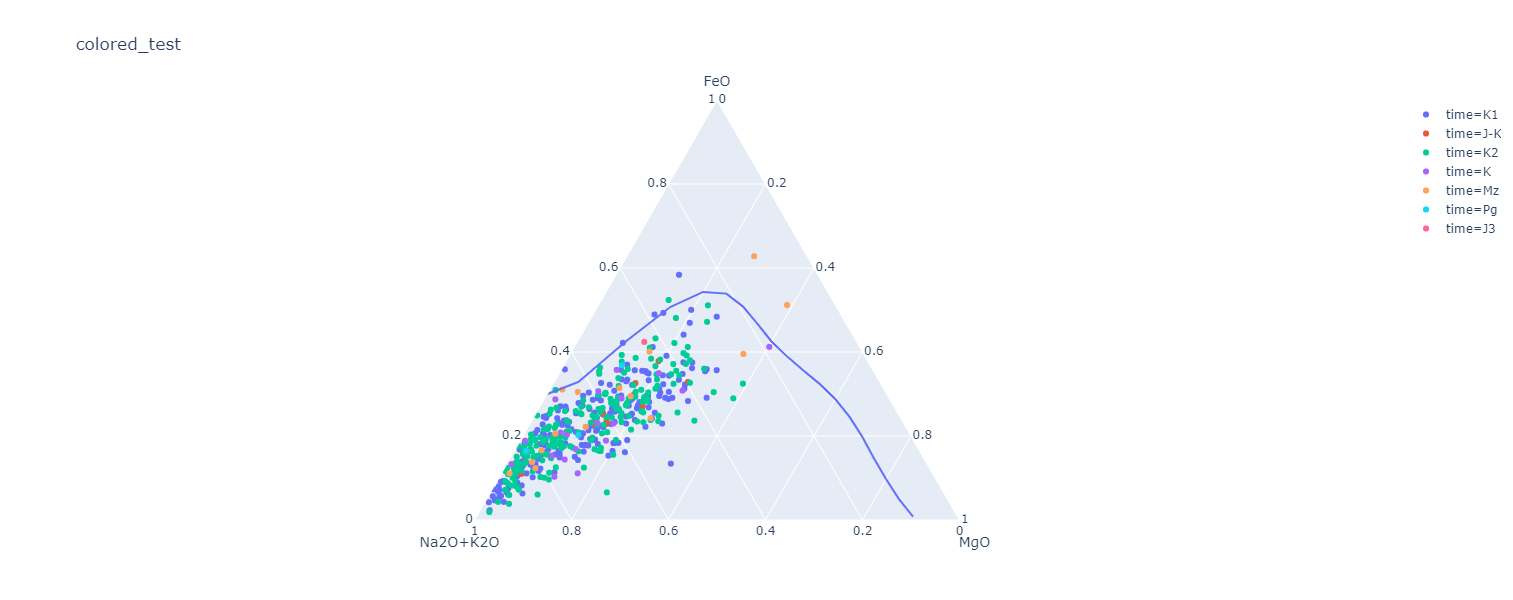

In [125]:
plot_ternary_diagram(petro_areas["area4"], Irvine_Barangar=True, save_name="colored_test")

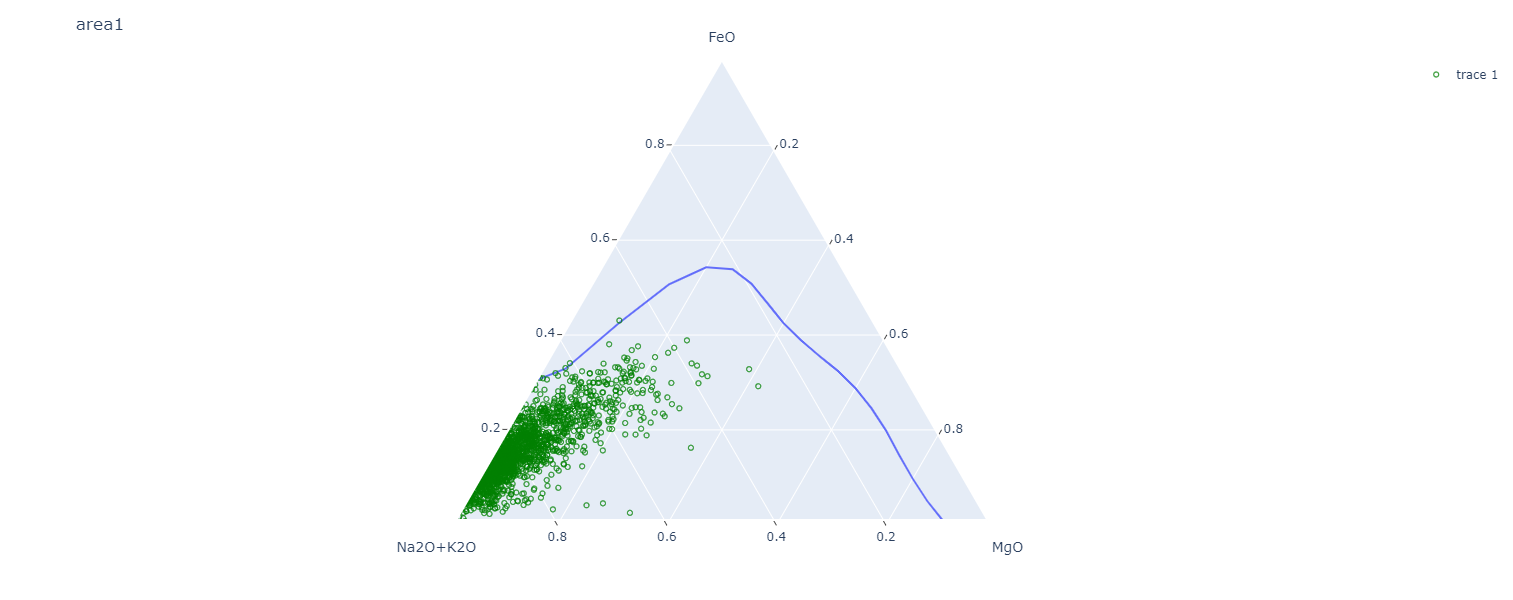

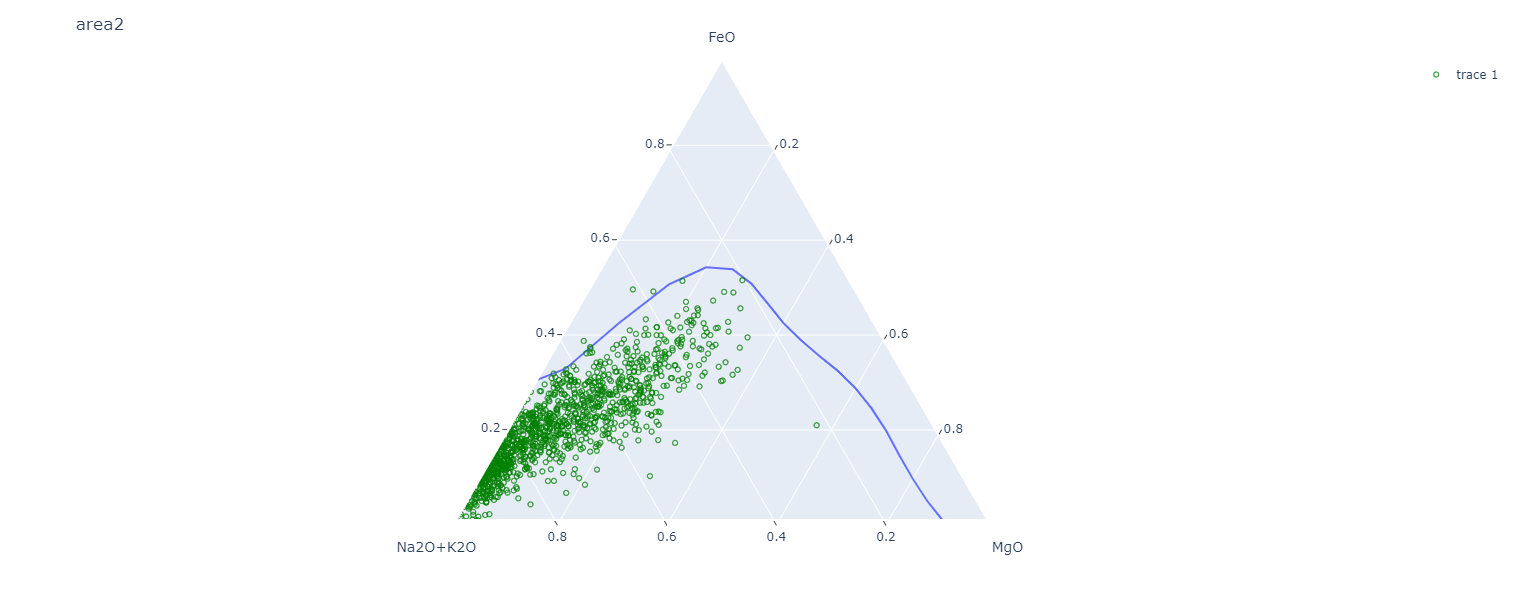

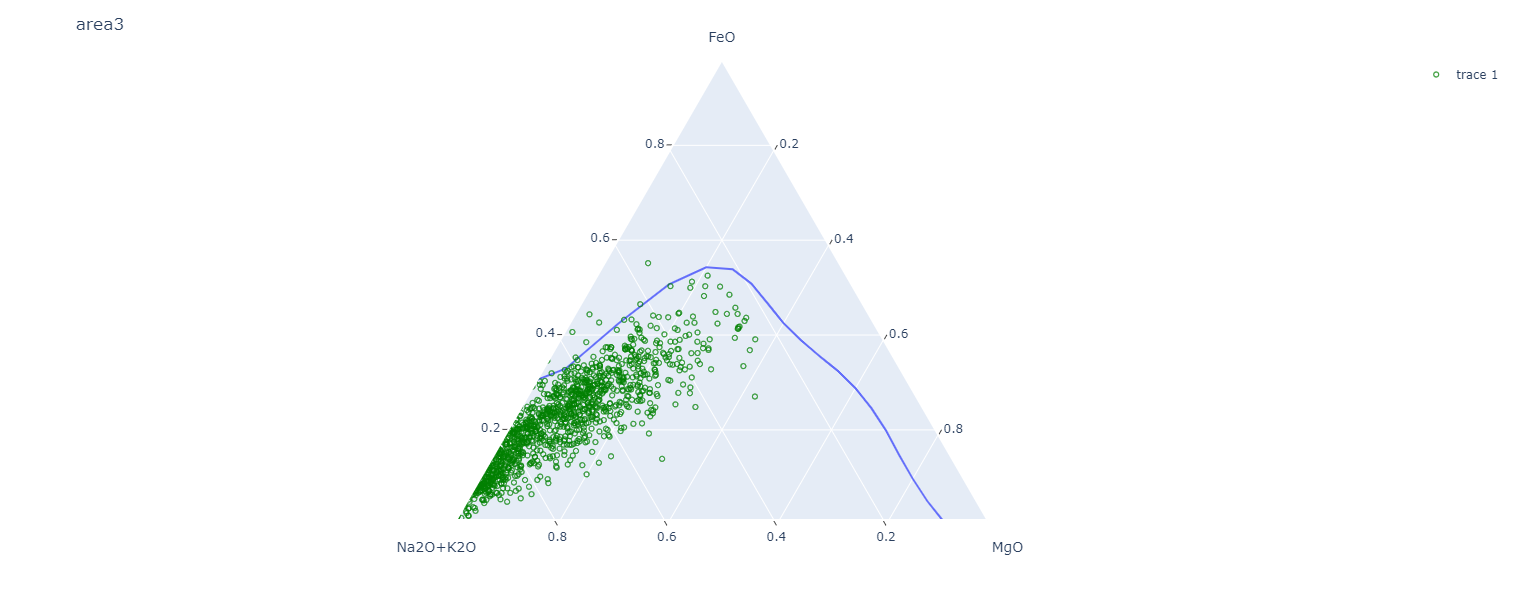

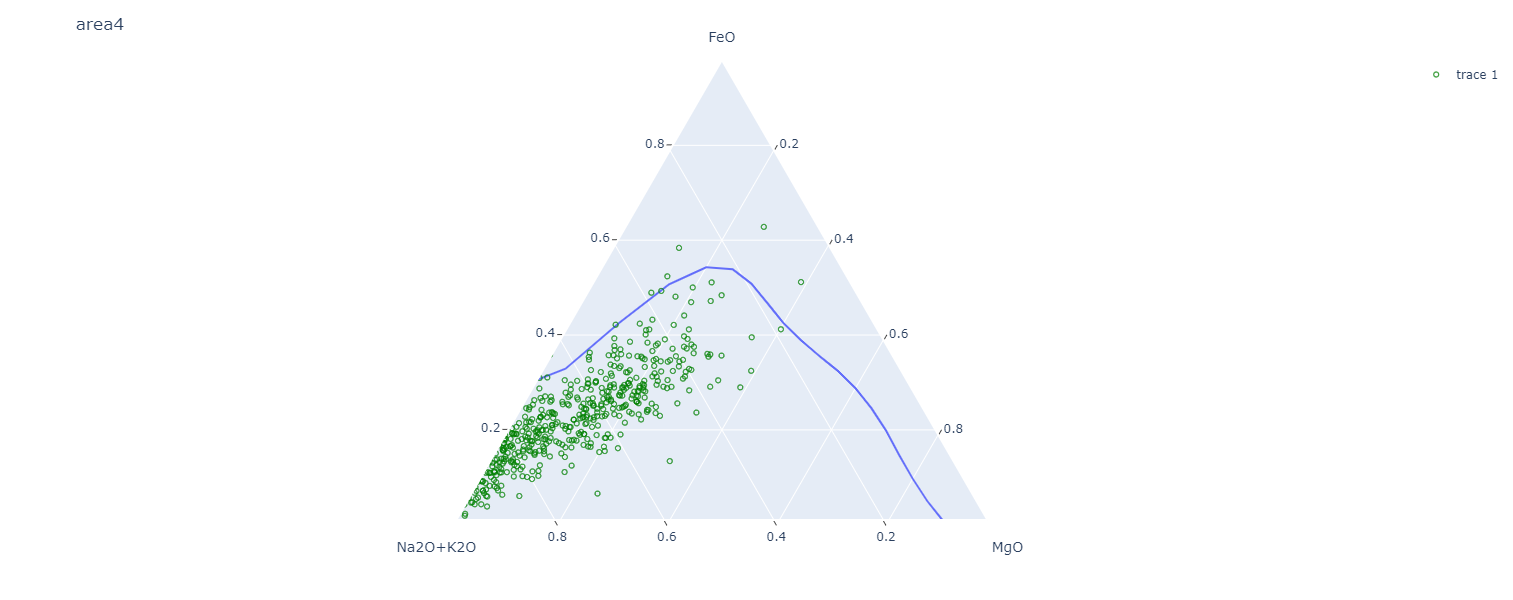

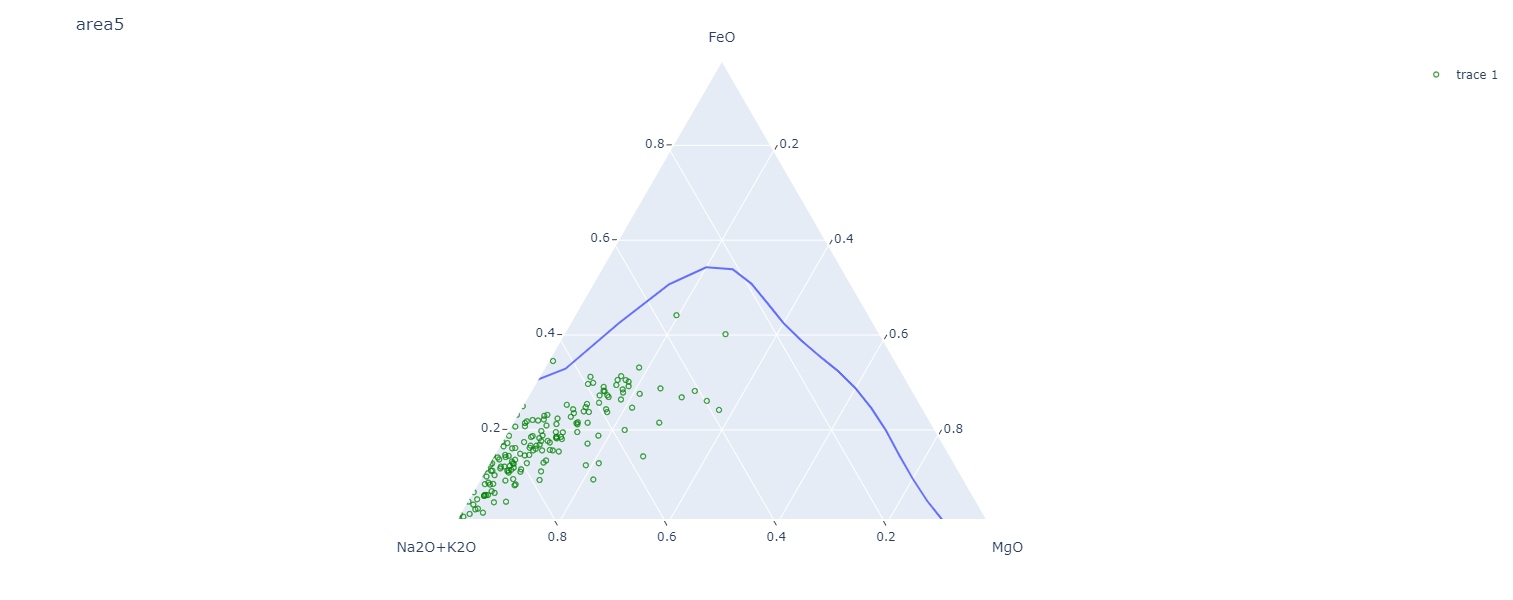

In [52]:
for area, petro in petro_areas.items():
    plot_ternary_diagram(petro=petro, save_name=area)

## plotting K20 vs SiO2

#### plotting boundary values according to (Rickwood, P.C., 1989)

###### shosonite_high_K_series1 = [(45, 1.38), (48, 1.7), (56, 3.3), (63, 4.20), (70, 5.1)]
###### shosonite_high_K_series2 = [(45, 1.37), (48, 1.6), (56, 2.98), (63, 3.87), (70, 4.61)]
###### High_K_calc_alkaline_series1 = [(45, 0.98), (49, 1.28), (52, 1.5), (63, 2.48), (70, 3.1), (75, 3.43)]
###### High_K_calc_alkaline_series2 = [(45, 0.92), (49, 1.1 ), (52, 1.35), (63, 2.32), (70, 2.86), (75, 3.25)]
###### Calc_alkaline_low_Kseries1 = [(45, 0.2), (48, 0.41), (61, 0.97), (70, 1.38), (75, 1.51)]
###### Calc_alkaline_low_Kseries2 = [(45,0.15),(48,0.3), (61,0.8), (70,1.23),(75, 1.44)]

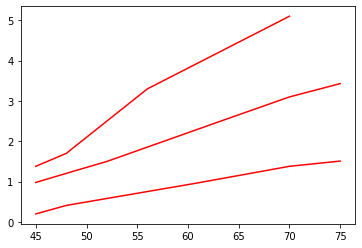

In [63]:
plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')


#### plotting area's

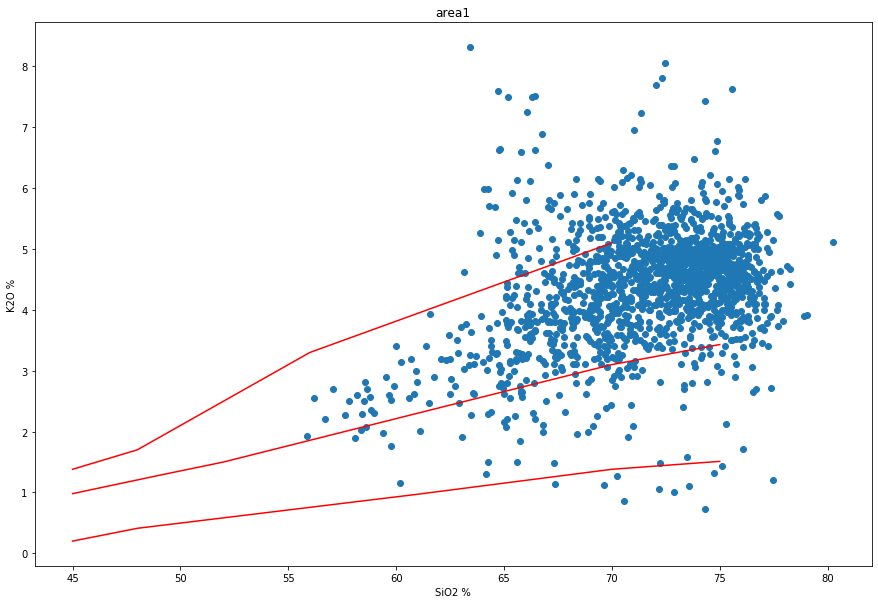

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(petro1["SiO2"], petro1["K2O"])

# import seaborn as sns
# sns.scatterplot(x="SiO2", y="K2O", data=petro1, hue="time)

plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')
plt.ylabel('K2O %')
plt.xlabel('SiO2 %')
plt.title('area1')
plt.show()


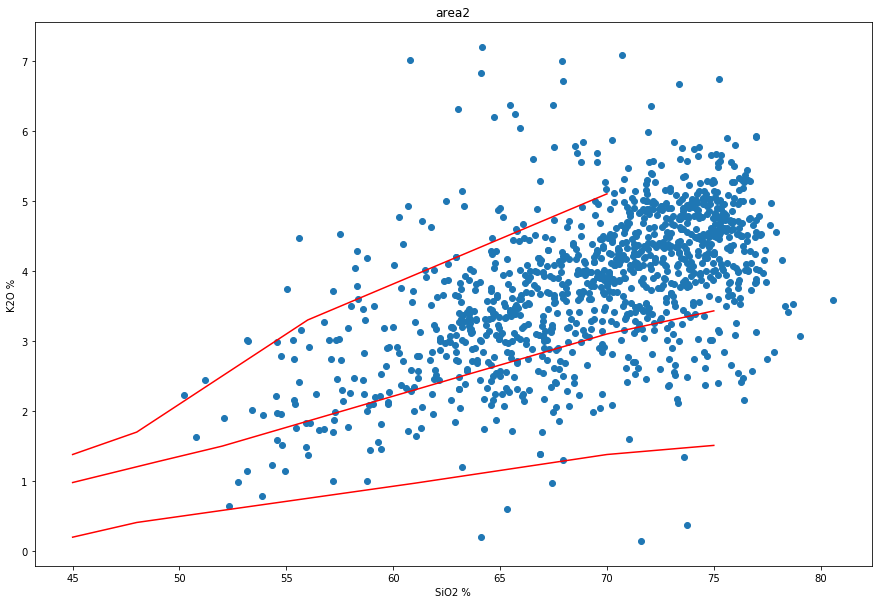

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(petro2["SiO2"], petro2["K2O"])
plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')
plt.ylabel('K2O %')
plt.xlabel('SiO2 %')
plt.title('area2')
plt.show()

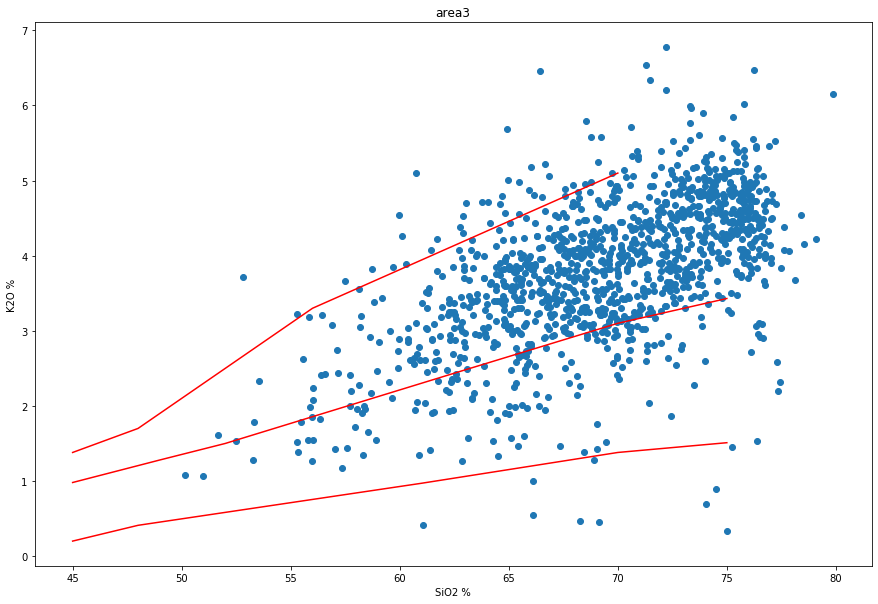

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(petro3["SiO2"], petro3["K2O"])
plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')
plt.ylabel('K2O %')
plt.xlabel('SiO2 %')
plt.title('area3')
plt.show()

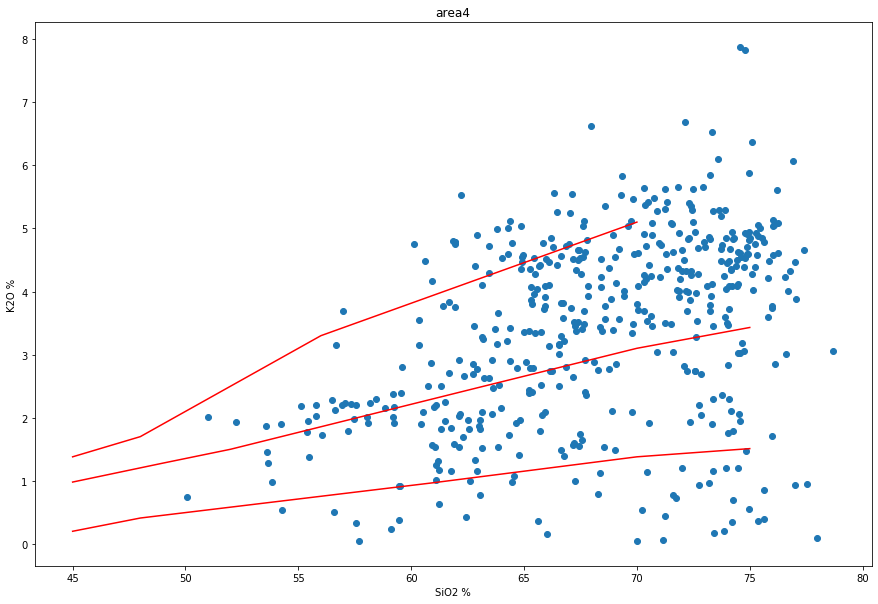

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(petro4["SiO2"], petro4["K2O"])
plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')
plt.ylabel('K2O %')
plt.xlabel('SiO2 %')
plt.title('area4')
plt.show()

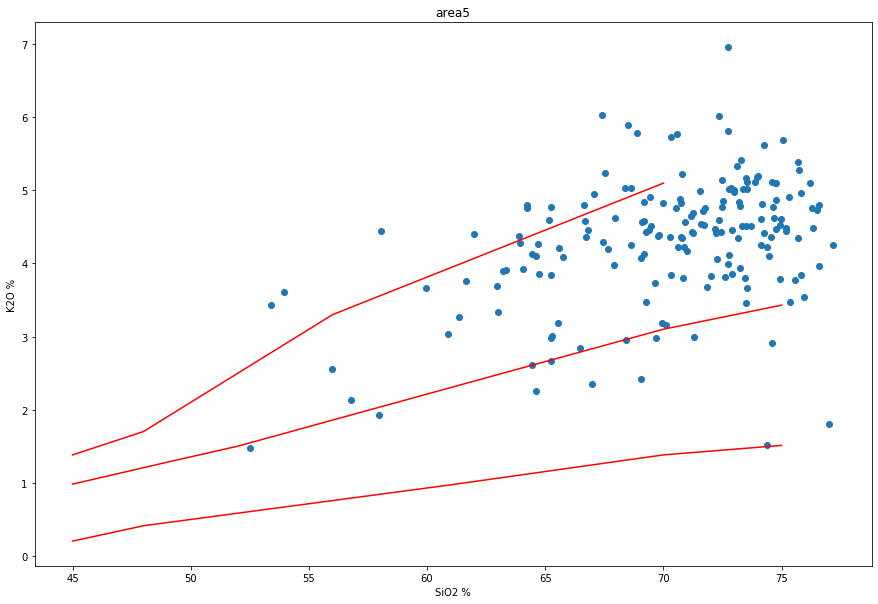

In [77]:
plt.figure(figsize=(15,10))
plt.scatter(petro5["SiO2"], petro5["K2O"])
plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')
plt.ylabel('K2O %')
plt.xlabel('SiO2 %')
plt.title('area5')
plt.show()

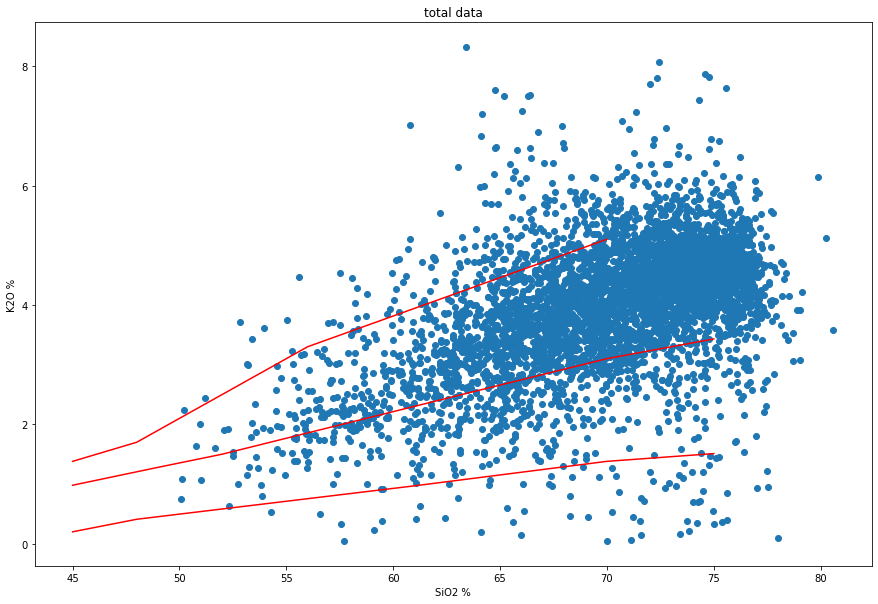

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(petro["SiO2"], petro["K2O"])
plt.plot([45, 48, 56, 63, 70], [1.38, 1.7, 3.3, 4.20, 5.1], 'red')
plt.plot([45, 49, 52, 63, 70, 75], [0.98, 1.28, 1.5, 2.48, 3.1, 3.43], 'red')
plt.plot([45, 48, 61, 70, 75], [0.2, 0.41, 0.97, 1.38, 1.51], 'red')
plt.ylabel('K2O %')
plt.xlabel('SiO2 %')
plt.title('total data')
plt.show()

## plotting (FeO/(FeO + MgO) / SiO2) --> ferroan vs magnesian : Frost, (2001)